<a href="https://colab.research.google.com/github/Archalharin/229351_LAB01/blob/main/660510632_229351_LAB09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ปฏิบัติการครั้งที่ 7 กระบวนวิชา 229351 Statistical Learning for Data Science

คำชี้แจง

ให้เริ่มทำปฏิบัติการจาก colab notebook หรือไฟล์ *.ipynb ที่กำหนดให้ จากนั้นบันทึกไว้เป็นไฟล์ *.pdf แล้วส่งใน Assignments

ดาวน์โหลดข้อมูลรถยนต์ชนิดต่างใน link ข้างล่างนี้  
https://donlapark.pages.dev/229351/data/elecequip.csv

In [1]:
# uploading the csv file to colab

!wget -O elecequip.csv https://donlapark.pages.dev/229351/data/elecequip.csv

--2025-09-04 02:10:09--  https://donlapark.pages.dev/229351/data/elecequip.csv
Resolving donlapark.pages.dev (donlapark.pages.dev)... 172.66.47.56, 172.66.44.200, 2606:4700:310c::ac42:2f38, ...
Connecting to donlapark.pages.dev (donlapark.pages.dev)|172.66.47.56|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3844 (3.8K) [text/csv]
Saving to: ‘elecequip.csv’

elecequip.csv       100%[===================>]   3.75K  --.-KB/s    in 0s      

2025-09-04 02:10:10 (46.1 MB/s) - ‘elecequip.csv’ saved [3844/3844]



In [2]:
# import module ที่ต้องใช้
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [47]:
# parse_dates ชื่อของคอลัมน์ที่จะเปลี่ยนให้เป็น datetime
# index_col ชื่อของคอลัมน์ที่จะให้เป็น index
# date_parser ฟังก์ชันที่เปลี่ยน string ให้เป็น datetime
data = pd.read_csv('elecequip.csv', parse_dates=['time'],
                                        index_col='time',
                                        date_format='%Y-%m')

data
#date_format

,Unnamed: 0,value
time,,
1996-01-01,1,79.35
1996-02-01,2,75.78
1996-03-01,3,86.32
1996-04-01,4,72.60
1996-05-01,5,74.86
...,...,...
2011-11-01,191,93.37
2011-12-01,192,98.34
2012-01-01,193,86.44


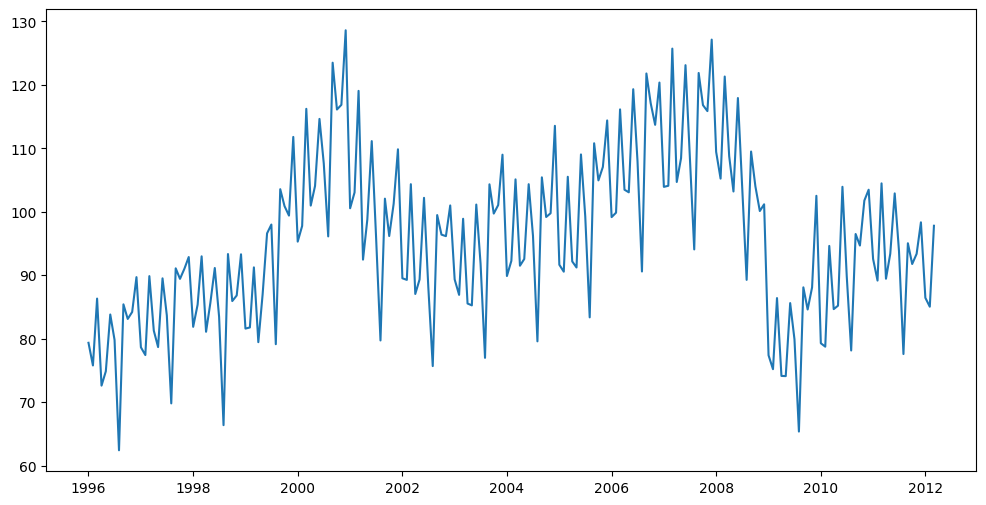

In [48]:
plt.figure(figsize=(12,6))
plt.plot(data["value"]);

In [49]:
# subsetting data at specified date

data

,Unnamed: 0,value
time,,
1996-01-01,1,79.35
1996-02-01,2,75.78
1996-03-01,3,86.32
1996-04-01,4,72.60
1996-05-01,5,74.86
...,...,...
2011-11-01,191,93.37
2011-12-01,192,98.34
2012-01-01,193,86.44


In [7]:
data.loc["1996-01-01"]

,1996-01-01
Unnamed: 0,1.00
value,79.35


In [8]:
# Add or change values

data.loc['2012-03-02','value'] = 86.45

data

,Unnamed: 0,value
time,,
1996-01-01,1.0,79.35
1996-02-01,2.0,75.78
1996-03-01,3.0,86.32
1996-04-01,4.0,72.60
1996-05-01,5.0,74.86
...,...,...
2011-12-01,192.0,98.34
2012-01-01,193.0,86.44
2012-02-01,194.0,85.04


# Moving average

In [50]:
#5-MA
data['MA'] = data['value'].rolling(window=5,center=True).mean() #เลขคี่
#12-MA
data['MA'] = data['value'].rolling(window=12,center=True).mean().rolling(window=2).mean().shift(-1) #เลขคู่

data.tail(12)

,Unnamed: 0,value,MA
time,,,
2011-04-01,184,89.45,94.735417
2011-05-01,185,93.40,94.264167
2011-06-01,186,102.90,93.700000
2011-07-01,187,93.77,93.230417
2011-08-01,188,77.58,92.803333
2011-09-01,189,95.04,92.353333
2011-10-01,190,91.77,NaN
2011-11-01,191,93.37,NaN
2011-12-01,192,98.34,NaN


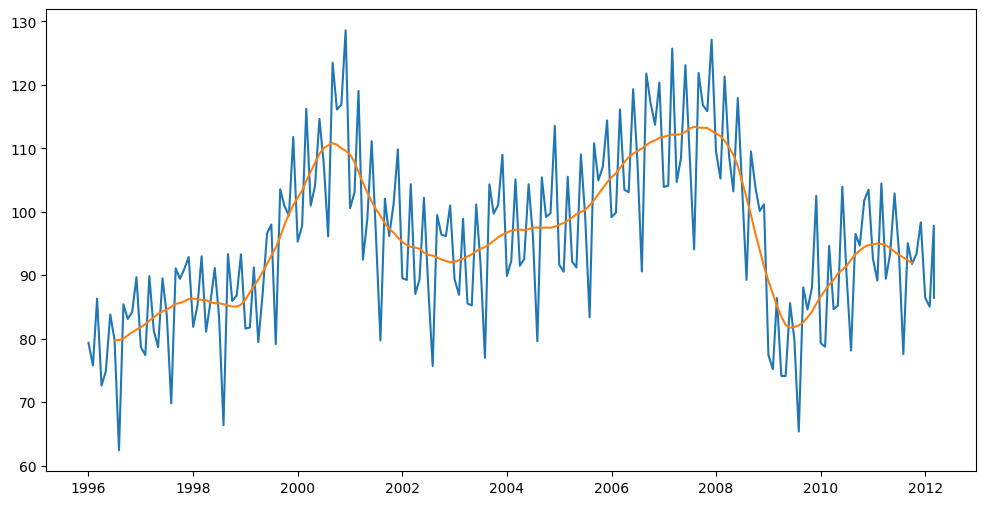

In [12]:
plt.figure(figsize=(12,6))
plt.plot(data['value'])
plt.plot(data['MA']);

# Classical decomposition

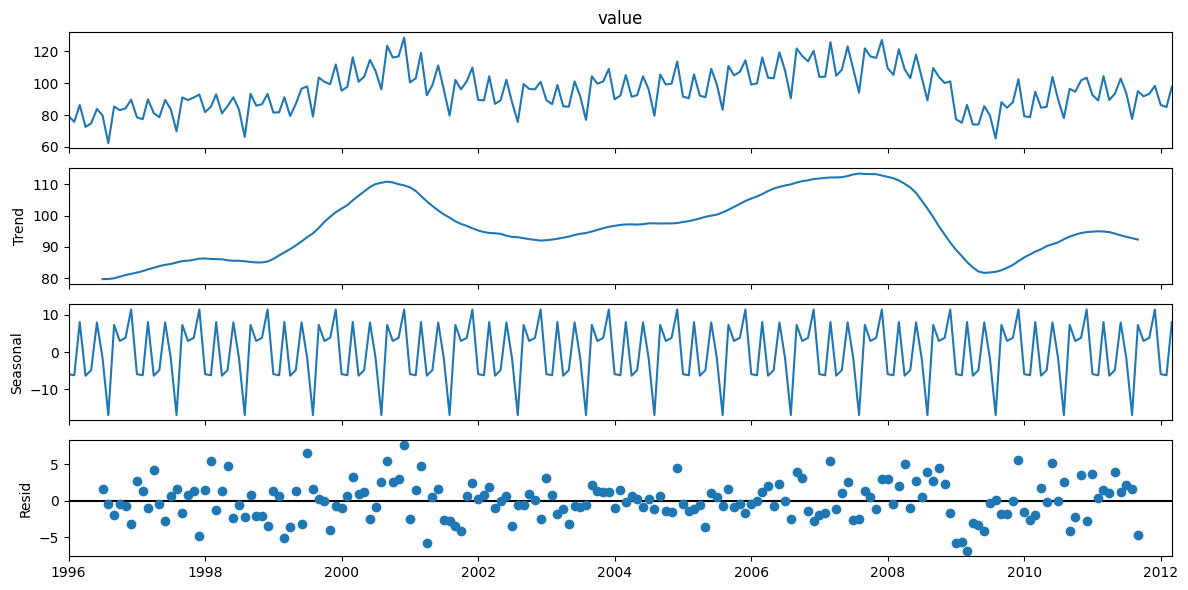

In [51]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib as mpl

mpl.rc("figure", figsize=(12,6))
result_add = seasonal_decompose(data['value'], model='additive',
                                period=12)

result_add.plot();

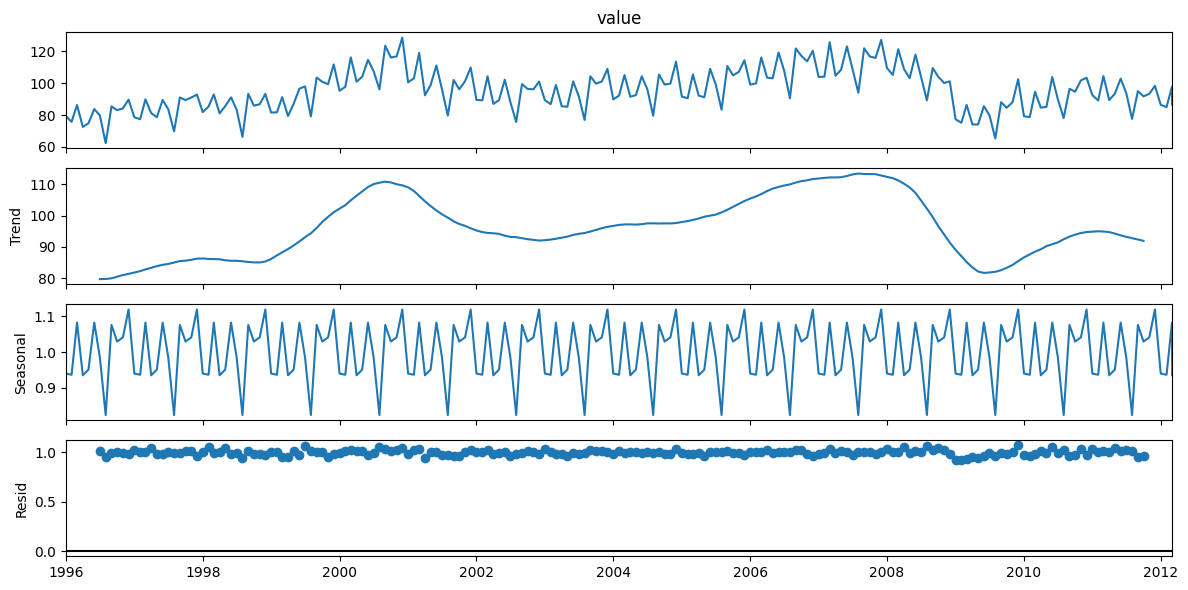

In [15]:
result_mul = seasonal_decompose(data['value'], model='multiplicative',
                                period=12)

result_mul.plot();

### เรียกดูแต่ละส่วน

In [16]:
print(result_add.trend)
print(result_add.seasonal)
print(result_add.resid)
print(result_add.observed)

time
1996-01-01   NaN
1996-02-01   NaN
1996-03-01   NaN
1996-04-01   NaN
1996-05-01   NaN
              ..
2011-12-01   NaN
2012-01-01   NaN
2012-02-01   NaN
2012-03-01   NaN
2012-03-02   NaN
Name: trend, Length: 196, dtype: float64
time
1996-01-01    -5.870845
1996-02-01    -6.182456
1996-03-01     8.099989
1996-04-01    -6.298150
1996-05-01    -4.801650
                ...    
2011-12-01    11.464322
2012-01-01    -5.870845
2012-02-01    -6.182456
2012-03-01     8.099989
2012-03-02    -6.298150
Name: seasonal, Length: 196, dtype: float64
time
1996-01-01   NaN
1996-02-01   NaN
1996-03-01   NaN
1996-04-01   NaN
1996-05-01   NaN
              ..
2011-12-01   NaN
2012-01-01   NaN
2012-02-01   NaN
2012-03-01   NaN
2012-03-02   NaN
Name: resid, Length: 196, dtype: float64
time
1996-01-01    79.35
1996-02-01    75.78
1996-03-01    86.32
1996-04-01    72.60
1996-05-01    74.86
              ...  
2011-12-01    98.34
2012-01-01    86.44
2012-02-01    85.04
2012-03-01    97.80
2012-03-02    86

### ปฏิบัติการครั้งที่ 7
1. สร้างโมเดลเพื่อการทำนายดังนี้
1.1 แบ่งข้อมูลออกเป็น 2 ส่วน
   - training set: วันที่ 1996-01-01 ถึง 2009-12-01
   - test set: วันที่ 2010-01-01 ถึง 2012-03-01  
1.2 แยกส่วนประกอบ $y_t=S_t+T_t+R_t$ บน training set
1.3 สร้าง time series ชุดใหม่ที่แสดงถึงทำนายค่าบน test set โดยนำค่า $T_t+R_t$ ของวันล่าสุดใน training set ที่มีค่า $T_t$ มาบวกกับแต่ละค่าใน $S_t$ จากวันที่ วันที่ 2010-01-01 ถึง 2012-03-01  
3. คำนวณ RMSE โดยใช้ฟังก์ชัน `rmse` ข้างล่าง
4. แสดงแผนภาพข้อมูล elecequip และค่าทำนายที่ได้

In [52]:
#สร้าง train test
ex_train = data.loc["1996-01-01":"2009-12-01"]
ex_test = data.loc["2010-01-01":"2012-03-01"]

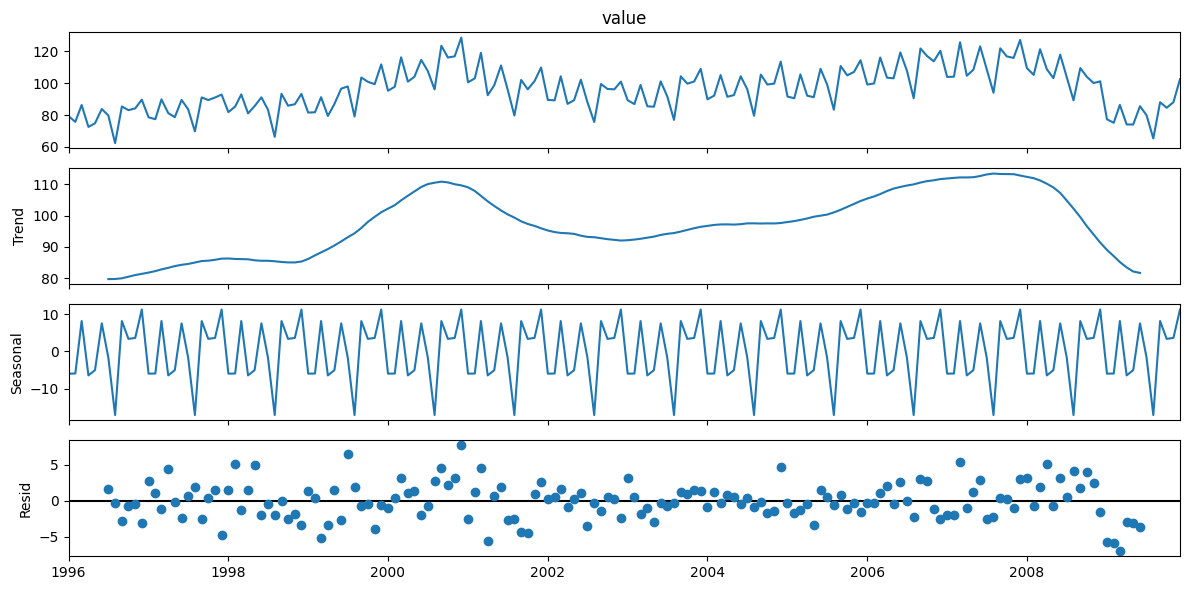

In [53]:
#ex_train
mpl.rc("figure", figsize=(12,6))
result_add2 = seasonal_decompose(ex_train['value'], model='additive',
                                period=12)

result_add2.plot();

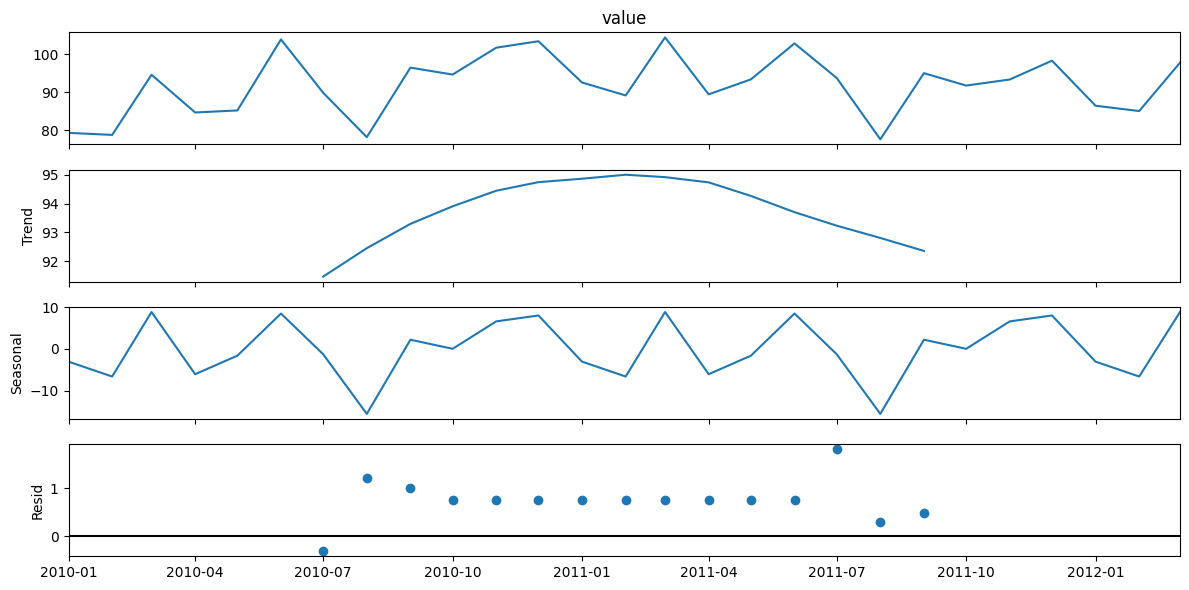

In [67]:
#ex_test
mpl.rc("figure", figsize=(12,6))
result_add3 = seasonal_decompose(ex_test['value'], model='additive',
                                period=12)

result_add3.plot();

In [55]:
print(result_add2.trend)
print(result_add2.seasonal)
print(result_add2.resid)
print(result_add2.observed)

time
1996-01-01   NaN
1996-02-01   NaN
1996-03-01   NaN
1996-04-01   NaN
1996-05-01   NaN
              ..
2009-08-01   NaN
2009-09-01   NaN
2009-10-01   NaN
2009-11-01   NaN
2009-12-01   NaN
Name: trend, Length: 168, dtype: float64
time
1996-01-01    -5.985857
1996-02-01    -5.957941
1996-03-01     8.183245
1996-04-01    -6.462428
1996-05-01    -5.041178
                ...    
2009-08-01   -17.138902
2009-09-01     8.178886
2009-10-01     3.378341
2009-11-01     3.644335
2009-12-01    11.289463
Name: seasonal, Length: 168, dtype: float64
time
1996-01-01   NaN
1996-02-01   NaN
1996-03-01   NaN
1996-04-01   NaN
1996-05-01   NaN
              ..
2009-08-01   NaN
2009-09-01   NaN
2009-10-01   NaN
2009-11-01   NaN
2009-12-01   NaN
Name: resid, Length: 168, dtype: float64
time
1996-01-01     79.35
1996-02-01     75.78
1996-03-01     86.32
1996-04-01     72.60
1996-05-01     74.86
               ...  
2009-08-01     65.36
2009-09-01     88.09
2009-10-01     84.60
2009-11-01     88.09
2009-1

In [68]:
print(result_add3.trend)
print(result_add3.seasonal)


time
2010-01-01          NaN
2010-02-01          NaN
2010-03-01          NaN
2010-04-01          NaN
2010-05-01          NaN
2010-06-01          NaN
2010-07-01    91.460417
2010-08-01    92.448333
2010-09-01    93.293333
2010-10-01    93.903750
2010-11-01    94.445000
2010-12-01    94.743333
2011-01-01    94.862500
2011-02-01    95.001667
2011-03-01    94.917500
2011-04-01    94.735417
2011-05-01    94.264167
2011-06-01    93.700000
2011-07-01    93.230417
2011-08-01    92.803333
2011-09-01    92.353333
2011-10-01          NaN
2011-11-01          NaN
2011-12-01          NaN
2012-01-01          NaN
2012-02-01          NaN
2012-03-01          NaN
Name: trend, dtype: float64
time
2010-01-01    -3.040174
2010-02-01    -6.589340
2010-03-01     8.814826
2010-04-01    -6.033090
2010-05-01    -1.611840
2010-06-01     8.452326
2010-07-01    -1.273090
2010-08-01   -15.513507
2010-09-01     2.198993
2010-10-01     0.028576
2010-11-01     6.577326
2010-12-01     7.988993
2011-01-01    -3.040174
20

In [69]:
last_trend_ex_train = result_add2.trend.dropna().iloc[-1]
last_resid_ex_train = result_add2.resid.dropna().iloc[-1]
ex_train_new = last_trend_ex_train + last_resid_ex_train+result_add3.seasonal
ex_train_new

,seasonal
time,
2010-01-01,75.016838
2010-02-01,71.467671
2010-03-01,86.871838
2010-04-01,72.023921
2010-05-01,76.445171
2010-06-01,86.509338
2010-07-01,76.783921
2010-08-01,62.543504
2010-09-01,80.256004


In [75]:
ex_test['value']

,value
time,
2010-01-01,79.28
2010-02-01,78.74
2010-03-01,94.62
2010-04-01,84.66
2010-05-01,85.20
2010-06-01,103.94
2010-07-01,89.87
2010-08-01,78.14
2010-09-01,96.50


In [71]:
def rmse(y_true,y_pred):
  # Inputs
  # y_true: actual value, y_pred: predicted values
  # Output: RMSE between y_true and y_pred
  return np.sqrt(np.mean(np.square(y_true-y_pred)))

In [84]:
vn = rmse(ex_test['value'],ex_train_new)
print(vn)

14.395922913666372


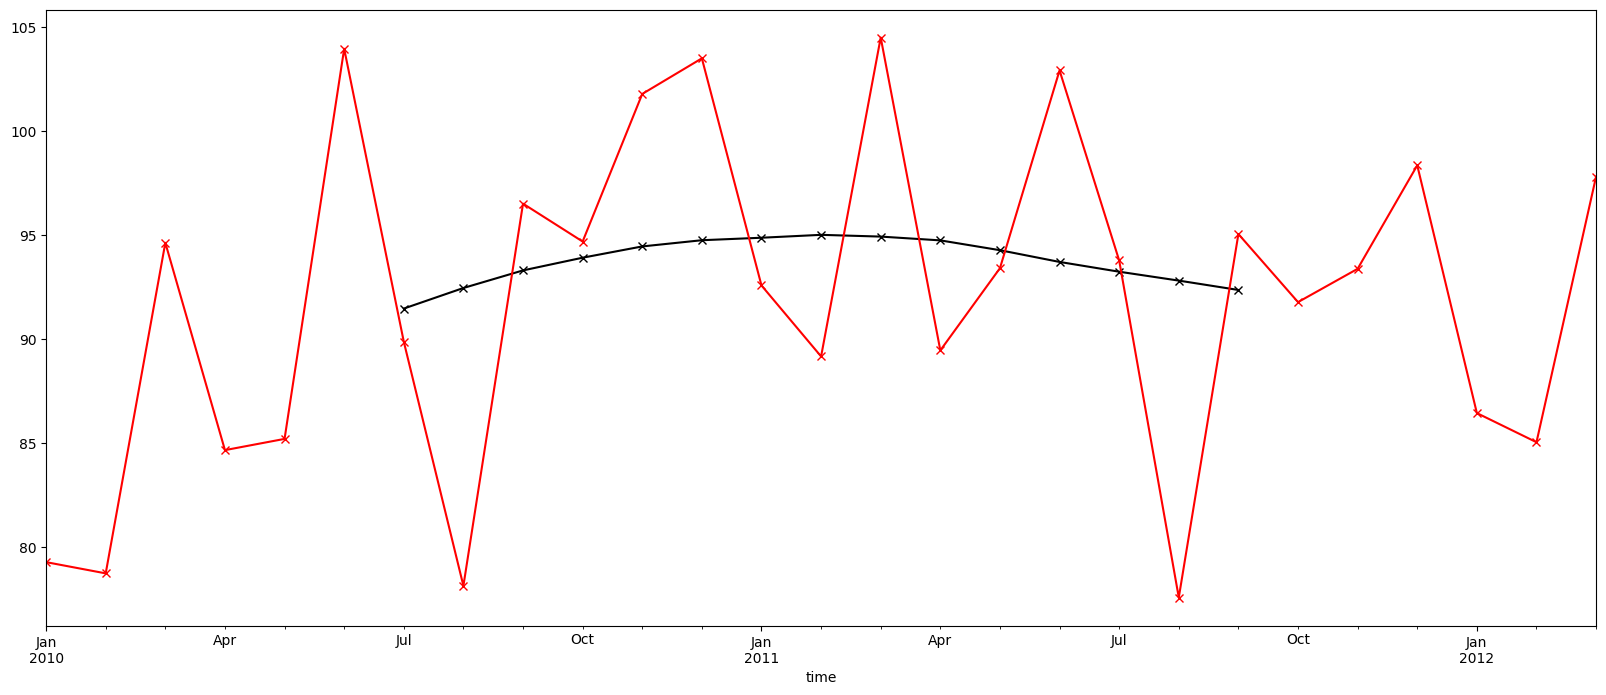

In [83]:
ax =result_add3.trend.plot(marker='x', color='black', figsize=(20,8))
ax2 = result_add3.observed.plot(marker='x' , color='red', figsize=(20,8))